In [62]:
import numpy as np
import matplotlib.pyplot as plt 

from PIL import Image

'''
helper functions to display images
'''


def show_image(img): 
    shape = img.shape
    if len(shape) == 3: 
        num_channels = shape[-1]
        assert num_channels==3, "RGB image must have 3 channels."
    elif len(shape) == 2: 
        num_channels = 1
    
    fig = plt.figure()
    if num_channels == 3: 
        plt.imshow(img.astype(np.uint8), vmin=0., vmax=255.)
    else: 
        plt.imshow(img.astype(np.uint8), vmin=0., vmax=255., cmap='gray')

    plt.show()
    plt.close()

def show_channels(img): 
    num_channels = 3
    titles = ['red', 'green', 'blue']
    fig = plt.figure()
    
    for i in range(num_channels): 
        plt.subplot(1, num_channels, i+1)
        plt.imshow(img.astype(np.uint8)[:, :, i], vmin=0., vmax=255., cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()
    plt.close()
    


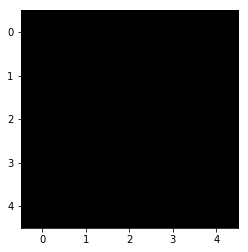

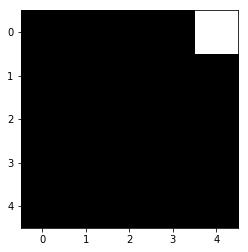

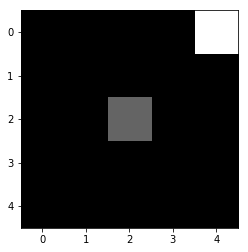

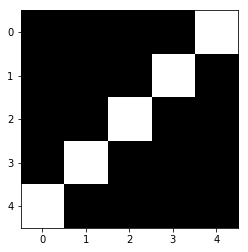

In [75]:
'''
manipulating arrays
'''
h=5
w=5
canvas = np.zeros([h, w])
show_image(canvas)

# draw a white pixel in the upper left hand corner
canvas[0, 4] = 255
show_image(canvas)

# draw a grey pixel in the middle
canvas[2, 2] = 100
show_image(canvas)

# make all the diagonal pixels (from upper right to lower left) white 
for i in range(h): 
    canvas[i, h-i-1] = 255
show_image(canvas)


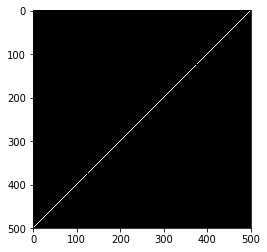

In [79]:
'''
draw the same diagonal line, but for a large canvas
'''
h = 500
w = 500
canvas = np.zeros([h, w])
for i in range(h): 
    canvas[i, h-i-1] = 255
show_image(canvas)



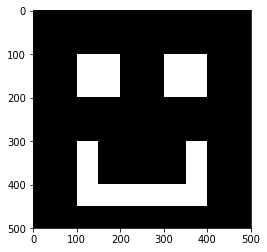

In [88]:
'''
draw a smiley face
'''
h = 500
w = 500
canvas = np.zeros([h, w])


# left eye
canvas[100:200, 100:200] = 255

# right eye
canvas[100:200, 300:400] = 255

# smiley face
canvas[300:400, 100:150] = 255
canvas[300:400, 350:400] = 255
canvas[400:450, 100:400] = 255

show_image(canvas)



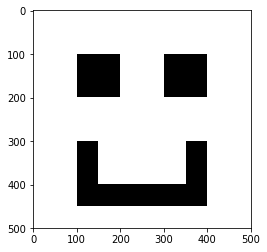

In [89]:
'''
invert the smiley face
'''
h = 500
w = 500
canvas = np.zeros([h, w])
canvas[:, :] = 255


# left eye
canvas[100:200, 100:200] = 0

# right eye
canvas[100:200, 300:400] = 0

# smiley face
canvas[300:400, 100:150] = 0
canvas[300:400, 350:400] = 0
canvas[400:450, 100:400] = 0

show_image(canvas)



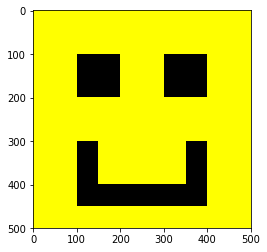

In [91]:
'''
make it a yellow smileyface
'''

canvas_rgb = np.zeros([h, w, 3])
canvas_rgb[:, :, 0] = canvas
canvas_rgb[:, :, 1] = canvas
show_image(canvas_rgb)



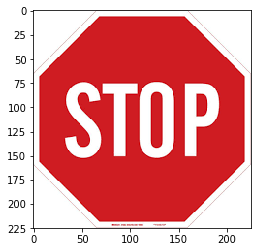

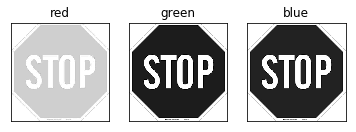

In [71]:
'''
load real image
visualize real image
'''
im_path = './images/stopsign.png'
im = Image.open(im_path).convert('RGB')
im_arr = np.array(im)
height, width, num_channels = im_arr.shape

show_image(im_arr)

'''
visualize each channel 
'''
show_channels(im_arr)


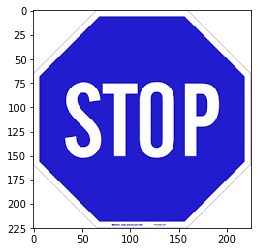

In [33]:
'''
turn the image blue
'''

swapped_im_arr = np.zeros([height, width, num_channels])
swapped_im_arr[:, :, 0] = im_arr[:, :, 2]
swapped_im_arr[:, :, 1] = im_arr[:, :, 1]
swapped_im_arr[:, :, 2] = im_arr[:, :, 0]
show_image(swapped_im_arr)


In [ ]:
f = 